<a href="https://colab.research.google.com/github/MOUNIKADONTULA/Bike-Sharing-Demand-Prediction-/blob/main/Mobile_Price_Range_Prediction_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction Classification 

##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

* The goal of this project is to analyze themobile price range prediction with classification.

* I have implemented a Mobile Price Prediction using different Machine Learning Algorithms. 

* There were approximately 2000 records and 21 attributes in the dataset.

* We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).
 
* This project will classify the price range of the mobile price. The price ranges from 0-3. We’ll discuss the price range in the dataset.
 
* Now I have trained a mobile price classification using 6 ML algorithms. 
  
* These models classifies the range of the mobile based on the different parameters like from camera, touch screen, cores, battery, clock speed, internal memory, battery capacity, etc. After training the model using 6 algorithms.

# **GitHub Link -** https://github.com/MOUNIKADONTULA/Mobile-Price-Range-Prediction-Classification.git

### **Problem Statement:**
**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.**
### **Data Description -**
* **Battery_power** - Total energy a battery can store in one time measured in mAh
* **Blue** - Has bluetooth or not
* ***Clock_speed*** - speed at which microprocessor executes instructions
* ***Dual_sim*** - Has dual sim support or not
* ***Fc*** - Front Camera mega pixels
* ***Four_g*** - Has 4G or not
* ***Int_memory*** - Internal Memory in Gigabytes
* ***M_dep*** - Mobile Depth in cm
* ***Mobile_wt*** - Weight of mobile phone
* ***N_cores*** - Number of cores of processor
* ***Pc*** - Primary Camera mega pixels
* ***Px_height*** - Pixel Resolution Height
* ***Px_width*** - Pixel Resolution Width
* ***Ram*** - Random Access Memory in Mega Bytes
* ***Sc_h*** - Screen Height of mobile in cm
* ***Sc_w*** - Screen Width of mobile in cm
* ***Talk_time*** - longest time that a single battery charge will last when you are
* ***Three_g*** - Has 3G or not
* ***Touch_screen*** - Has touch screen or not
* ***Wifi*** - Has wifi or not
* ***Price_range*** - This is the target variable with value of 
* 0(low cost), 
* 1(medium cost),
* 2(high cost) and
* 3(very high cost).
* Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

In [ ]:
#  importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import sklearn
%matplotlib inline
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Locating the path of csv file and reading it
file_path= '/content/drive/MyDrive/data_mobile_price_range.csv'
df=pd.read_csv(file_path)

In [ ]:
# Checking the head of the data
df.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [ ]:
# Checking the tail of the data
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
#Checking the shape of data
print(df.shape)
print(f'Total Rows = {df.shape[0]}\nTotol Columns={df.shape[1]} ')

(2000, 21)
Total Rows = 2000
Totol Columns=21 


In [ ]:
# Checking Statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


We can see that sc_width and px_height has minimum value 0. which is not possible in any mobile. We need to handle this mismatch.

# Data Cleaning

In [ ]:
# Checking How many observations having screen width value as 0.
print(df[df['sc_w']==0].shape[0])

180


In [ ]:
# Checking How many observations having px_hieght value as 0.
print(df[df['px_height']==0].shape[0])

2


In [ ]:
# As there are only 2 observations having px_height=0. so we will drop it.
print(df[df['px_height']!=0].shape[0])

1998


## Nearest Neighbors Imputations (KNNImputer)

The idea in kNN methods is to identify 'k' samples in the dataset that are similar or close in the space. Then we use these 'k' samples to estimate the value of the missing data points. Each sample's missing values are imputed using the mean value of the 'k'-neighbors found in the dataset.

Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

* Before using KNN Imputer we need to replace 0 with NAN values. so that it will work.

In [ ]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
df['sc_w']=df['sc_w'].replace(0,np.nan)

In [ ]:
# import KNN imputer frio sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
df=pd.DataFrame(impute_knn.fit_transform(df),columns=df.columns)

In [ ]:
# Checking shape
df.shape

(2000, 21)

In [ ]:
# Checking How many observations having sc_w value as 0.
df[df['sc_w']==0].shape[0]

0

**Thus we have handled the mismatched values of the data.**

In [ ]:
# Checking the datatypes, non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   float64
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   float64
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   float64
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   float64
 18  touch_sc

* **We have only float data type in our data set and have zero null values.**
* **Price_range is our target variable.**

###**Checking for Null Values**

In [ ]:
# Checking Null values.
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

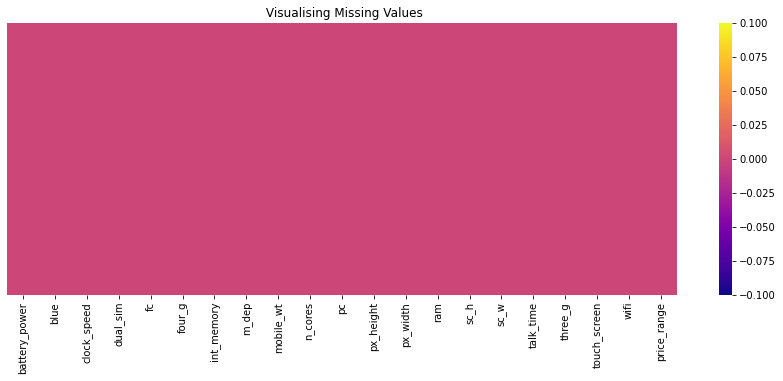

In [ ]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

**There are no null values in the data set.**

###**Checking for Duplicate Values**

In [ ]:
# Checking Duplicate values in data set.
print(f' We have {df.duplicated().sum()} duplicate values in dataset.')

 We have 0 duplicate values in dataset.


# **EDA( Exploratory Data Analysis)**
EDA stands for Exploratory Data Analysis. It is a process of analyzing and understanding the data, which is an essential step in the data science process. The goal of EDA is to gain insights into the data, identify patterns, and discover relationships and trends. It is an iterative process that helps to identify outliers, missing values, and any other issues that may affect the analysis and modeling of the data.

### **Let's have look at target variable**

In [ ]:
# lets have look at our target variable's counts
price_range_values=df['price_range'].value_counts()
price_range_values

1.0    500
2.0    500
3.0    500
0.0    500
Name: price_range, dtype: int64

we have equal number of obseravtions for each category. Thus we don't have imbalanced target variable.Accuracy score will be the best evalaution metric for us to select the model.***

***The target variable with value of***
* ***0=low cost,***
* ***1=medium cost,***
* ***2=high cost,***
* ***3=very high cost.***

<Axes: ylabel='price_range'>

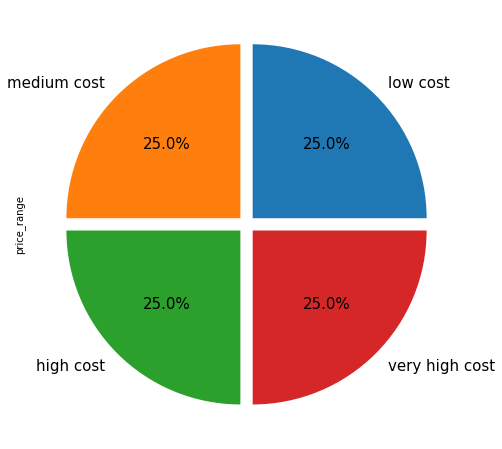

In [ ]:
# Visualizing the Target variable's class distribution with pie chart.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)    

* **We can see that our target varibale is equally distributed.** 
* **Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.**

### **Correlation of Dependent variable with the other independent variable.**

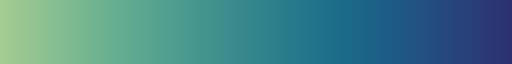

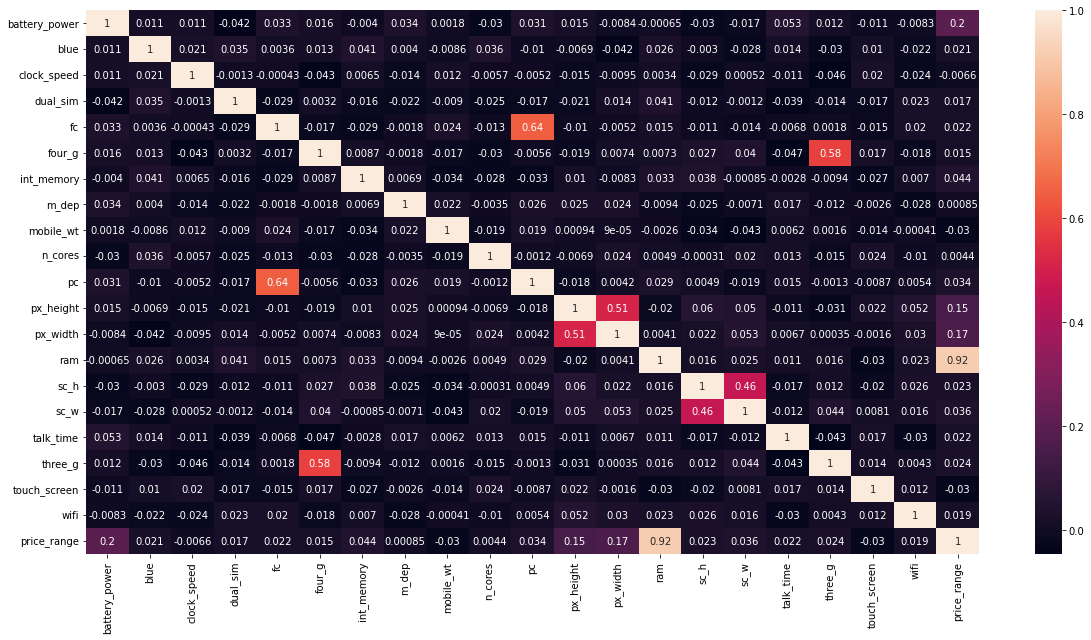

In [ ]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True) 
sns.color_palette("crest", as_cmap=True)
# cmap=plt.cm.Accent_r)

* ***RAM has strong positive correlation with the Price_range.Thus RAM increases price range also increase.***
* ***Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.***
* ***Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.***

* ***Four_g and Three_g are highly positvely correlated.***
* ***primary camera i.e pc and front camera fc are positively correlated.***
* ***sc_h and sc_w are positively correlated.***

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### **Univariate Analysis of Categorical columns.**

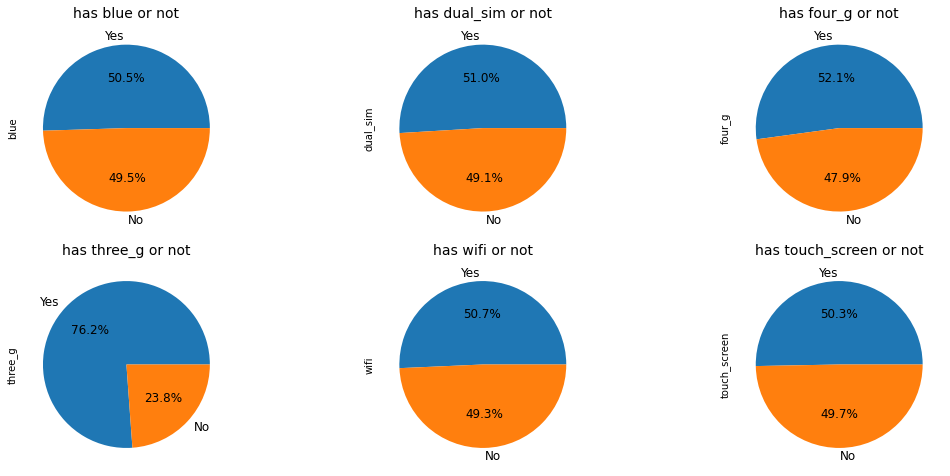

In [ ]:
# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  df[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1

* ***1 means it has the specifications.***
* ***0 means it do not have the specifications.***
* ***Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreen are almost 50 %.***
* ***very few mobiles(23.8%) do not have Three_g.***

### **Relation Between RAM,Battery_power,px_height and px_width**

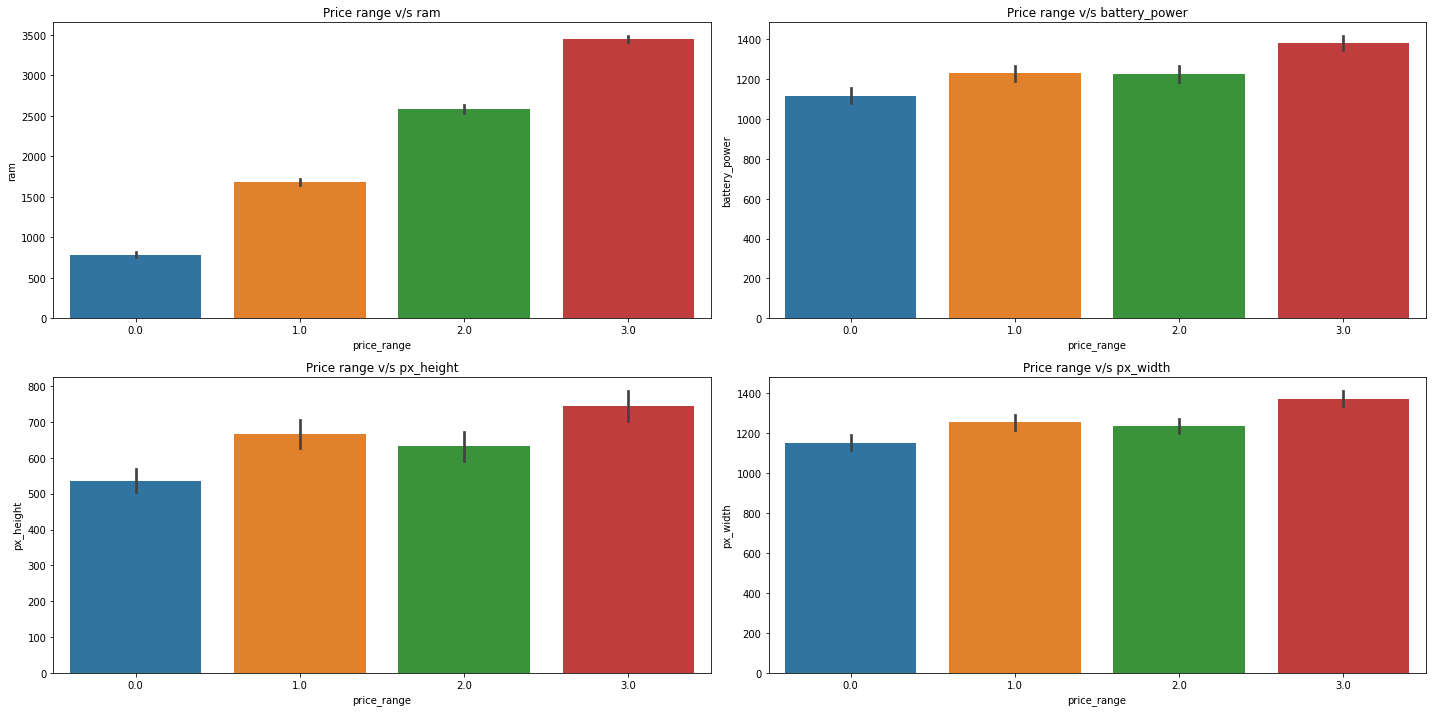

In [ ]:
# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2   
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=df['price_range'],y=df[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()

* ***Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.***
* ***Mobiles having RAM less than 1000 MB falls under low cost category.***
* ***Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.***
* ***Mobiles with more than 700 pixel height and width more than 1300 has very high cost.***

### **Checking which numerical feature is driving the price range most.**

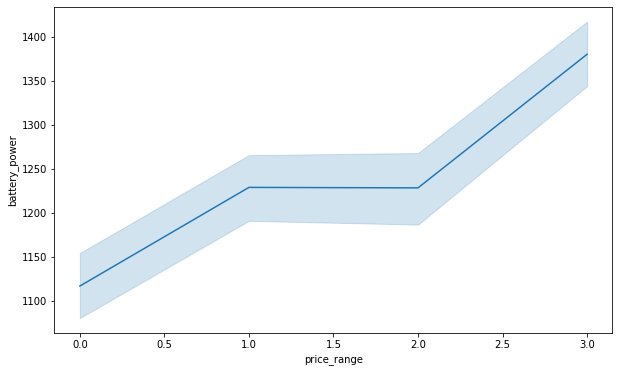

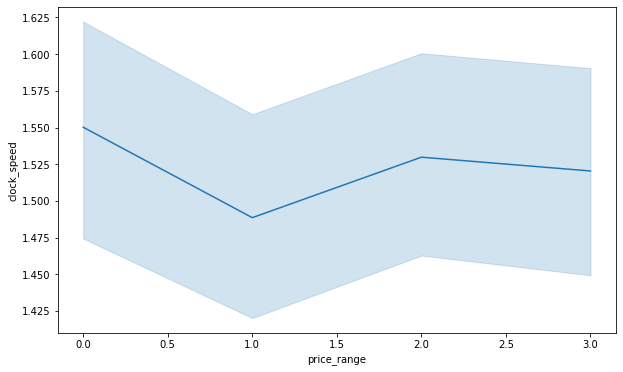

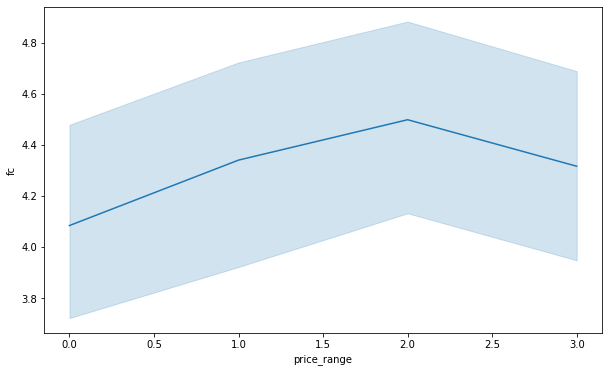

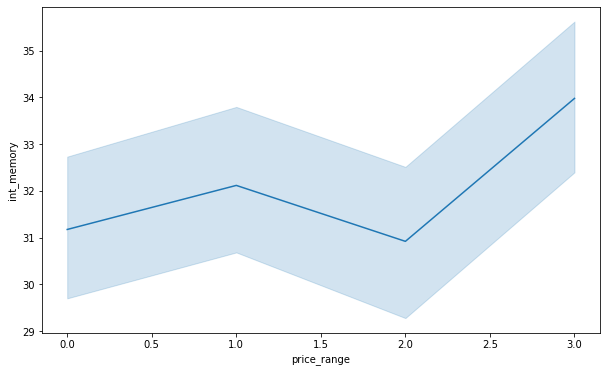

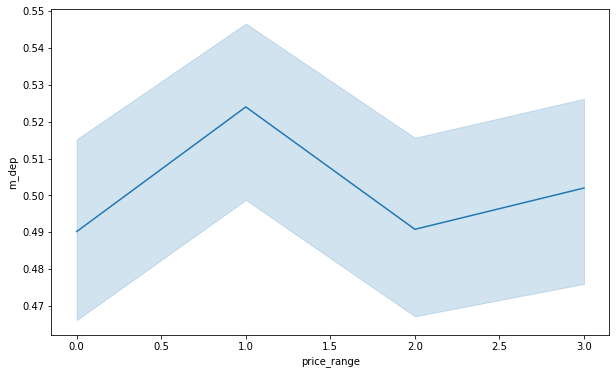

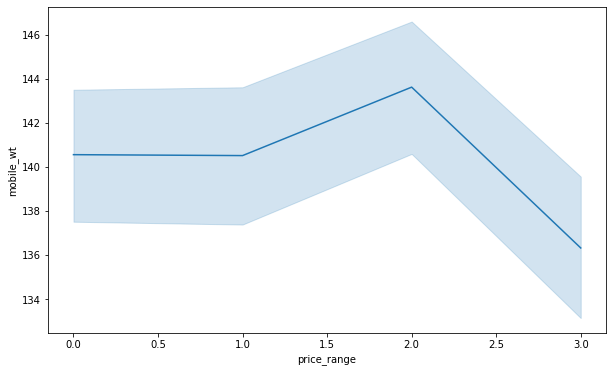

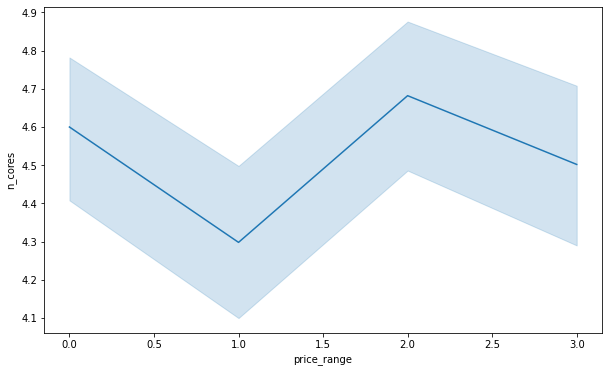

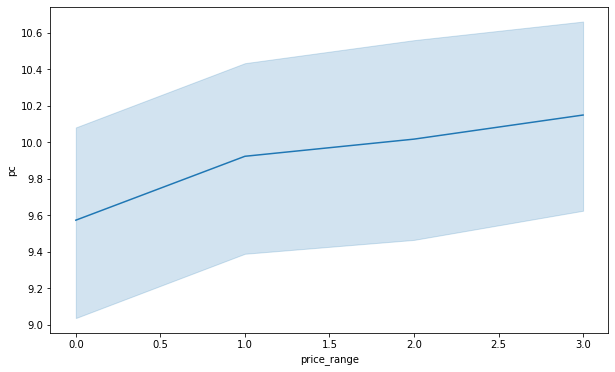

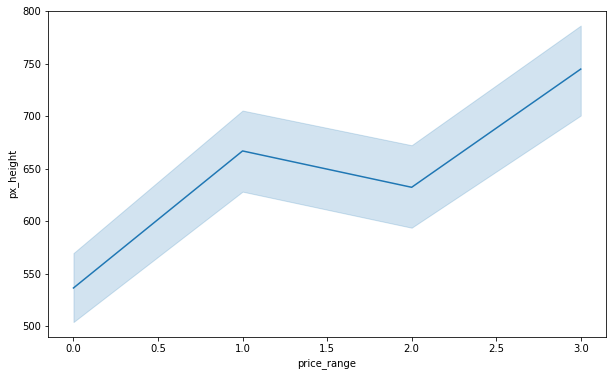

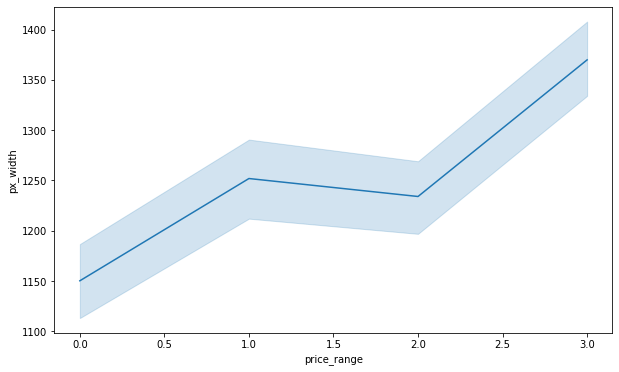

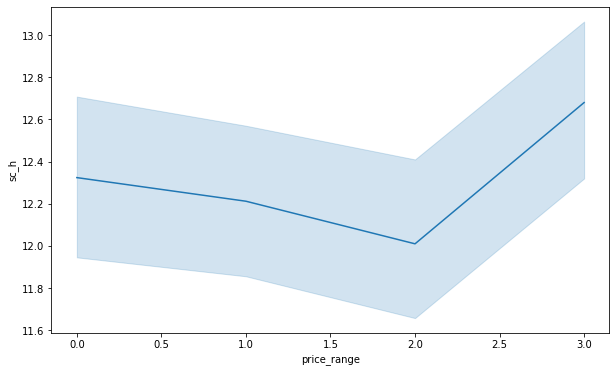

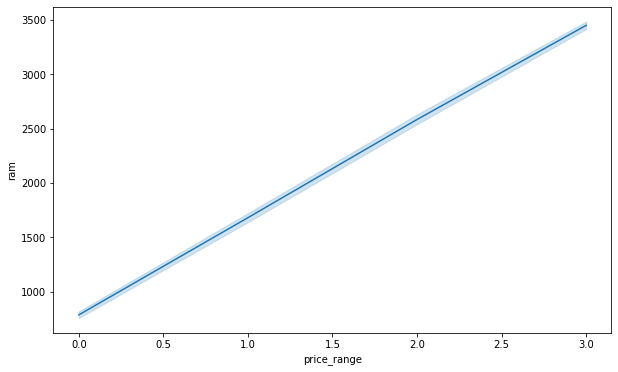

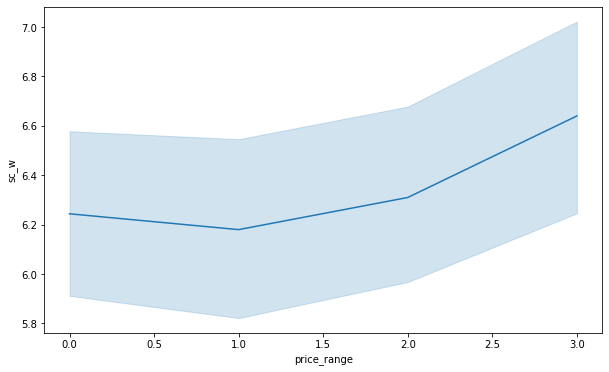

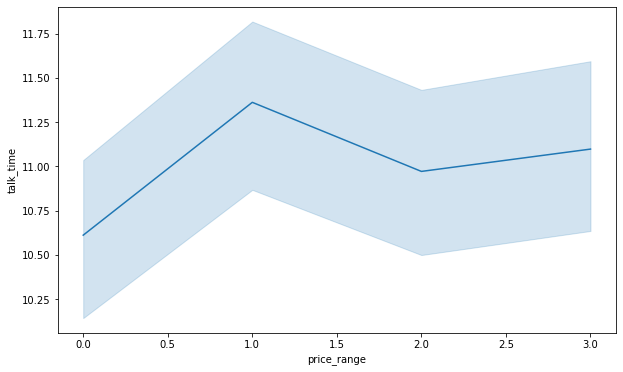

In [ ]:
list_1=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']
# plotting boXplot and distribution
counter=1
for var in list_1:
    plt.figure(figsize=(10,6))
    sns.lineplot(x=df['price_range'],y=df[var])

* **For class 1 and class2 battery power range is almost similar. As battery power increases price also increases whcih is quite obivious.***
* **Mobiles in very high price range(Class 3) has less weight compared to other classes.That means as weight of mobiles decrease price increases.**
* **Mobiles having max screen  height and width falls in very high price category. We can see in linechart of sc_width and sc_height from class 2 screen width and hieght starts increasing with price. Similar case is with px_height and px_width. As resolution of screen increases the price also increases**
***RAM has clear relationship with price range we saw that in correlation matrix also.**

### **Mobiles with both 3G and 4G.**

In [ ]:
# Mobiles have both 3G and 4G specifications.
three_g_4g_df=df[(df['three_g']==1) & (df['four_g']==1)]

In [ ]:
three_g_4g_df['price_range'].value_counts()

3.0    275
1.0    262
0.0    259
2.0    247
Name: price_range, dtype: int64

In [ ]:
three_g_4g_df['price_range']

1       2.0
2       2.0
4       1.0
6       3.0
9       0.0
       ... 
1991    3.0
1995    0.0
1997    3.0
1998    0.0
1999    3.0
Name: price_range, Length: 1043, dtype: float64

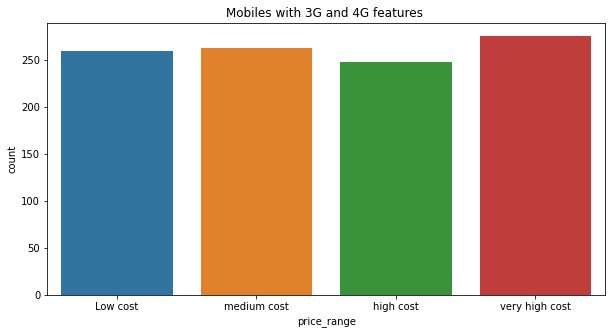

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=three_g_4g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 3G and 4G features ")
plt.show()

###**Mobiles having no 3G and 4G.** 

In [ ]:
No_3g_4G_df=df[(df['three_g']!=1) & (df['four_g']!=1)]

In [ ]:
No_3g_4G_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
10,769.0,1.0,2.9,1.0,0.0,0.0,9.0,0.1,182.0,5.0,...,248.0,874.0,3946.0,5.0,2.0,7.0,0.0,0.0,0.0,3.0
19,682.0,1.0,0.5,0.0,4.0,0.0,19.0,1.0,121.0,4.0,...,902.0,1064.0,2337.0,11.0,1.0,18.0,0.0,1.0,1.0,1.0
22,1949.0,0.0,2.6,1.0,4.0,0.0,47.0,0.3,199.0,4.0,...,407.0,822.0,1433.0,11.0,5.0,20.0,0.0,0.0,1.0,1.0
30,1579.0,1.0,0.5,1.0,0.0,0.0,5.0,0.2,88.0,7.0,...,1358.0,1739.0,3532.0,17.0,11.0,12.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1454.0,0.0,2.6,0.0,8.0,0.0,6.0,0.4,199.0,3.0,...,698.0,1018.0,1300.0,10.0,9.0,2.0,0.0,0.0,1.0,1.0
1982,1784.0,0.0,1.6,0.0,4.0,0.0,41.0,0.4,164.0,6.0,...,610.0,1437.0,2313.0,14.0,1.0,11.0,0.0,1.0,0.0,2.0
1983,1262.0,0.0,1.8,1.0,12.0,0.0,34.0,0.1,149.0,5.0,...,223.0,737.0,3248.0,13.0,3.0,4.0,0.0,1.0,1.0,2.0
1988,1547.0,1.0,2.9,0.0,2.0,0.0,57.0,0.4,114.0,1.0,...,347.0,957.0,1620.0,9.0,2.0,19.0,0.0,1.0,1.0,1.0


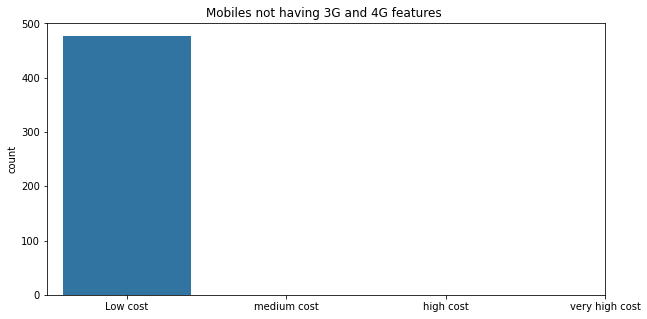

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(No_3g_4G_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles not having 3G and 4G features ")
plt.show()

* Its very obvious that low cost mobiles will not have 3G and 4G.
* Mobiles with very high cost may have 5G. As we know technologies are changes everytime.

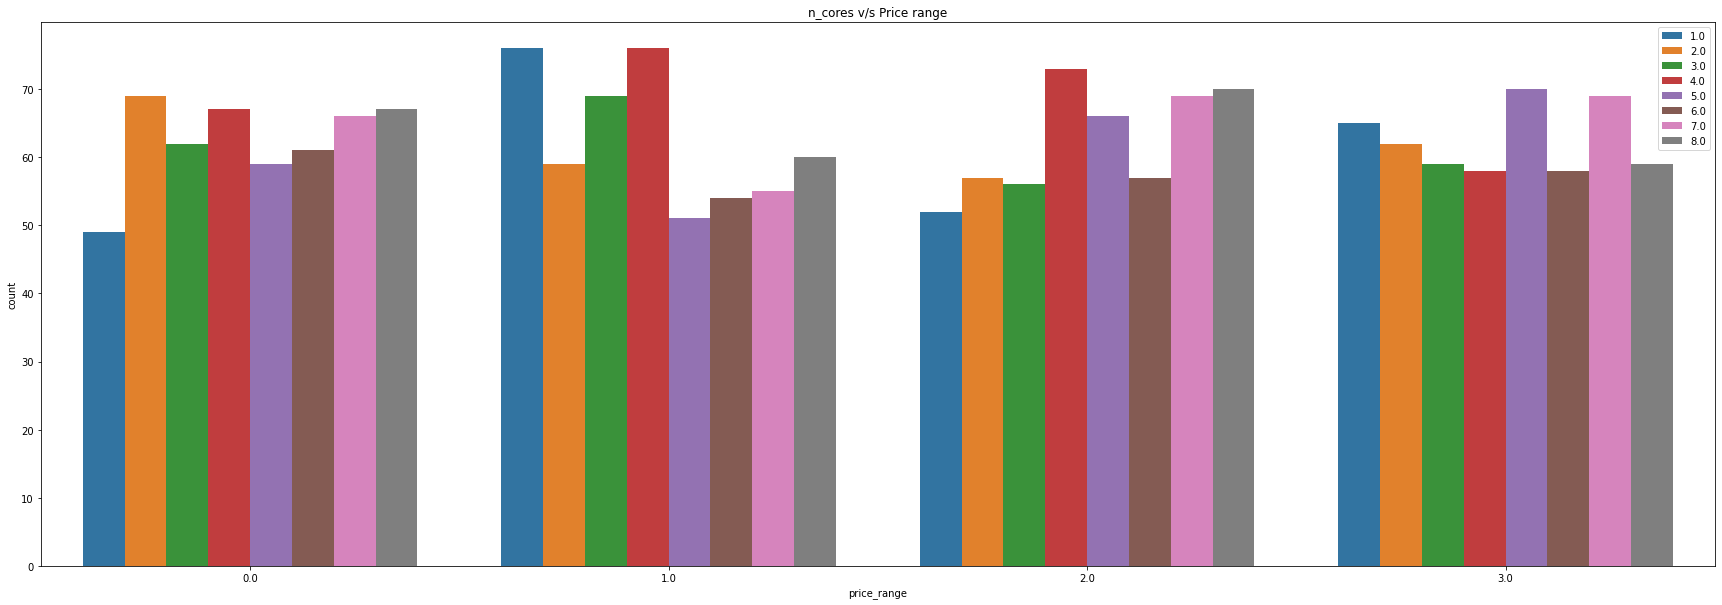

In [ ]:
# n_cores v/s price range
plt.figure(figsize=(30,10))
sns.countplot(x=df['price_range'],hue=df['n_cores'])
plt.title("n_cores v/s Price range")
plt.legend(loc='best')

Observations:
* Price range 0 has majority of phones with 2 core processors
* Price range 1 has majority of phones with 1 and 4 core processors
* Price range 2 has majority of phones with 4 core processors
* Price range 3 has majority of phones with 5 and 7 core processors

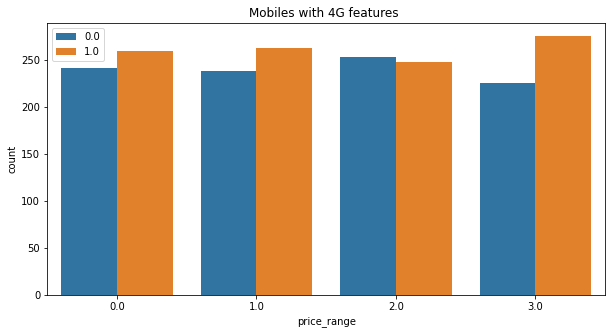

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['price_range'],hue=df['four_g'])
plt.title("Mobiles with 4G features ")
plt.legend(loc='best')

Majority of phones of only price range 2 dont have 4G service.

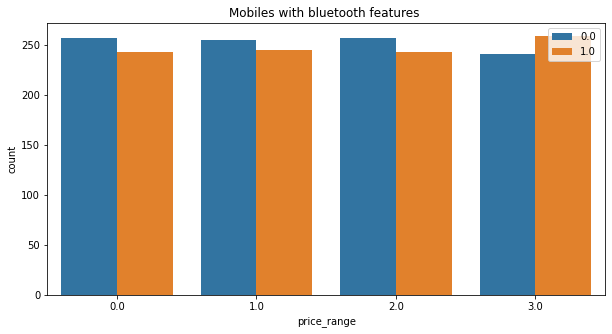

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['price_range'],hue=df['blue'])
plt.title("Mobiles with bluetooth features ")
plt.legend(loc='best')

Majority of phones of price range from 0 to 2 dont have bluetooth on other hand price range of 3 have bluetooth service.

## **Checking the distribution of numerical columns and Outliers.**

In [ ]:
# numeric column list
numeric_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

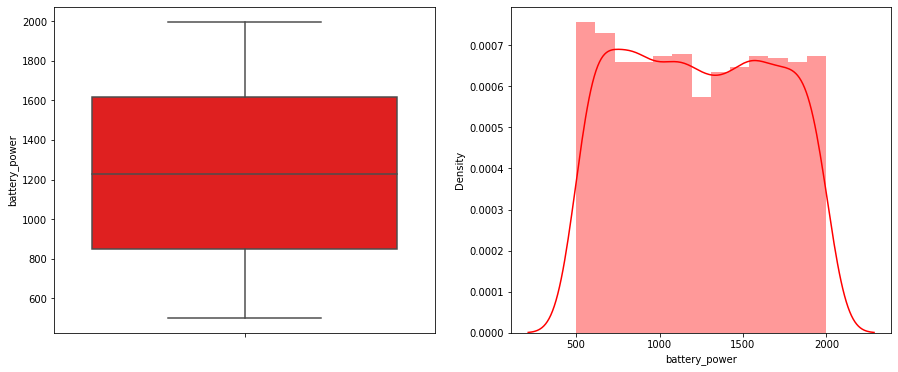

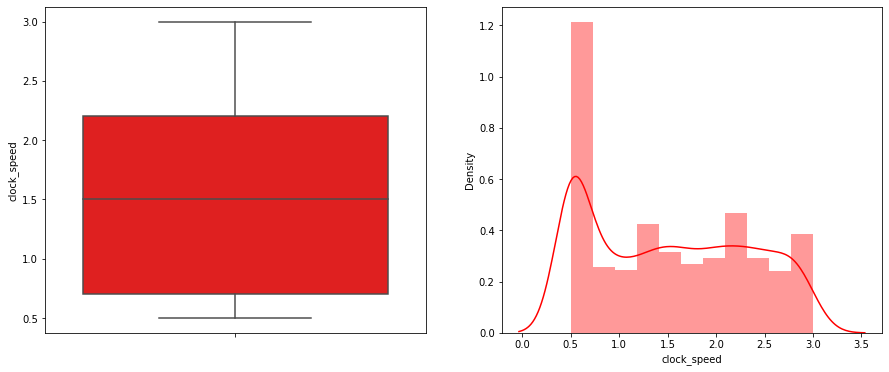

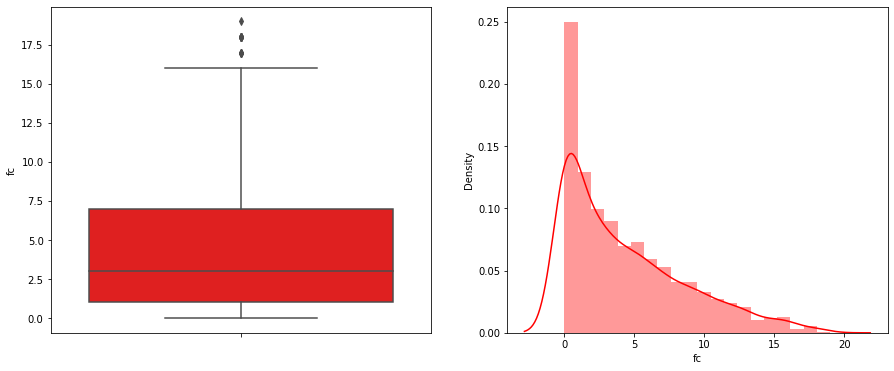

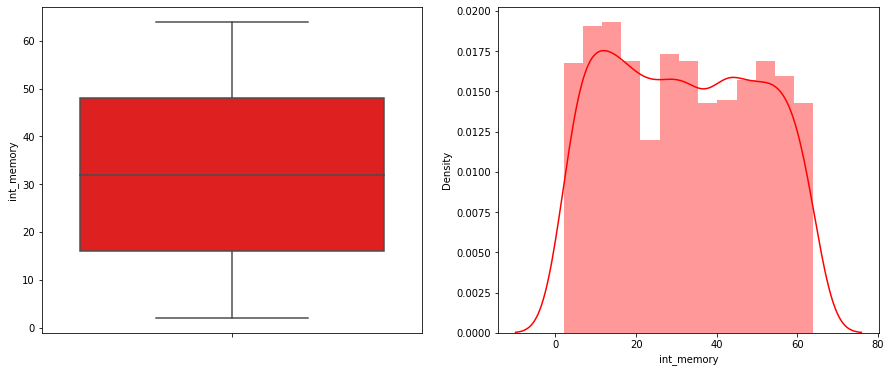

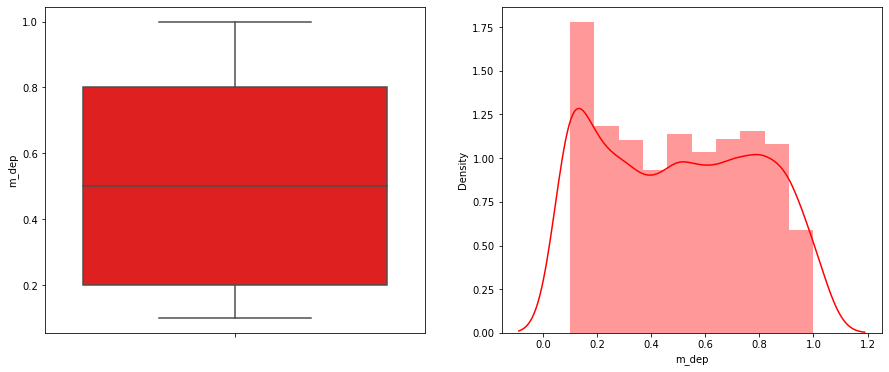

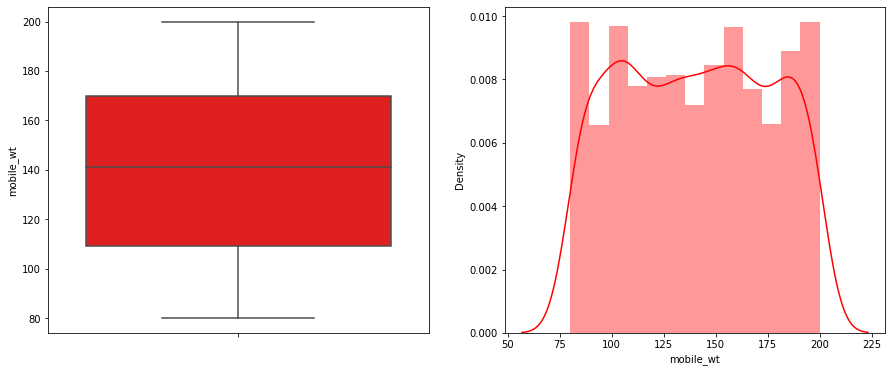

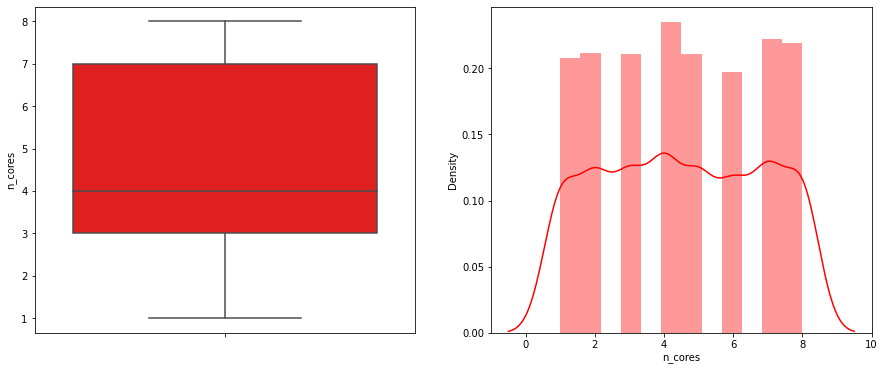

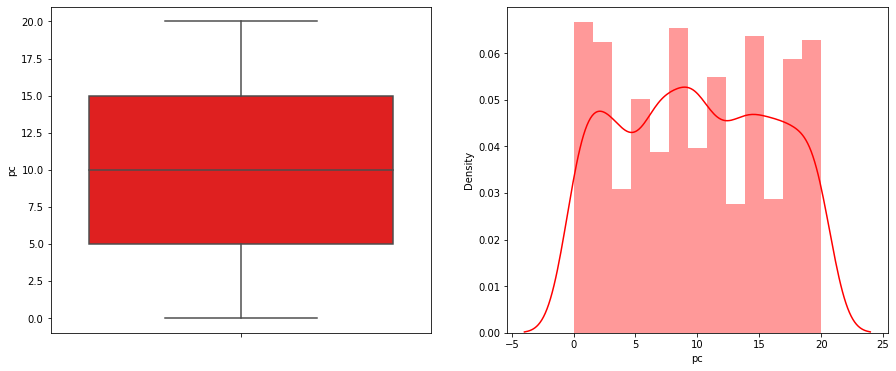

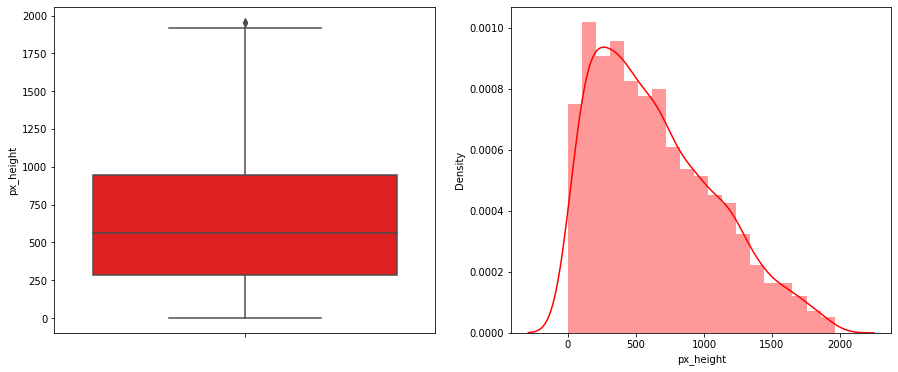

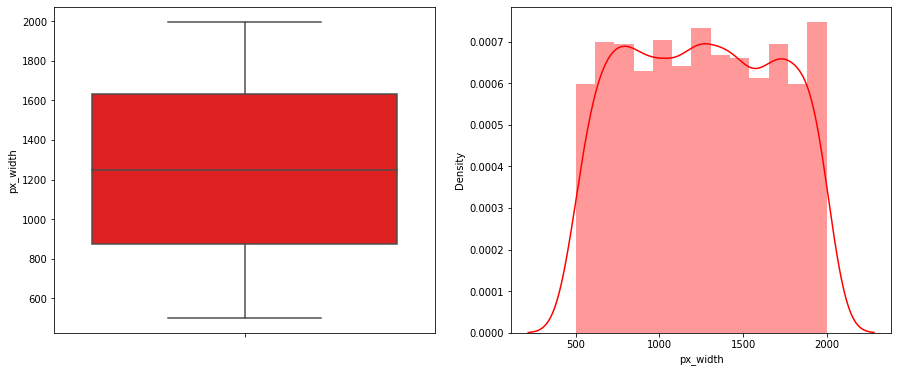

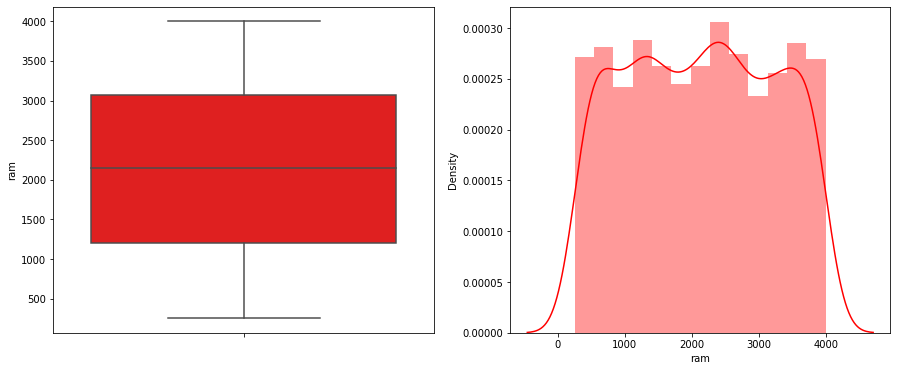

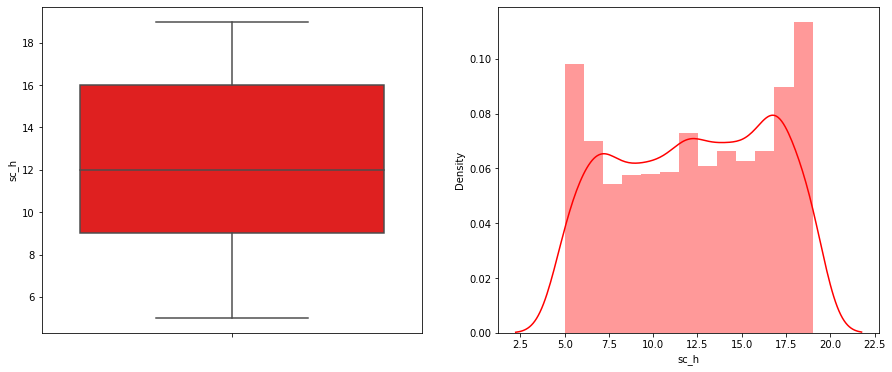

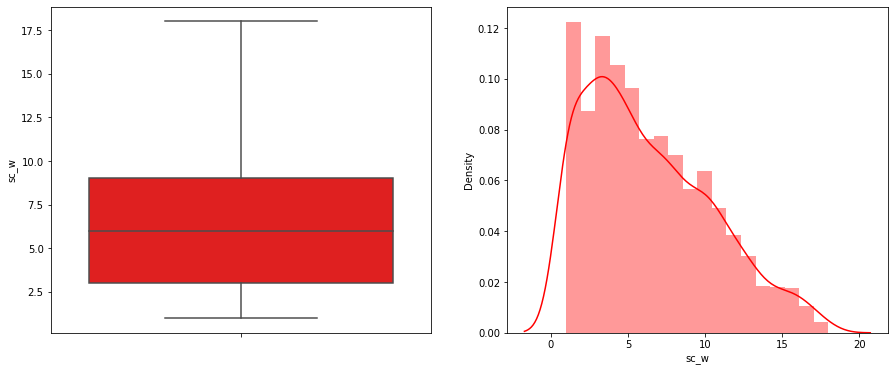

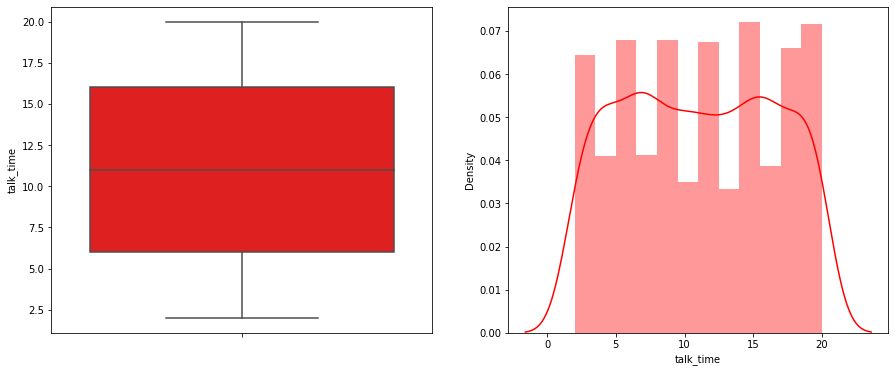

In [ ]:
# plotting boXplot and distribution
for var in numeric_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var],color='red')
    fig.set_title('')
    fig.set_ylabel(var)
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var],color='red')
    fig.set_xlabel(var)
    plt.show()

* Data is well distrubted.
* fc and px_height has some outliers.

# Outlier Treatment.

We can use the IQR method of identifying outliers to set up a “fence” outside of Q1 and Q3. Any values that fall outside of this fence are considered outliers. To build this fence we take 1.5 times the IQR and then subtract this value from Q1 and add this value to Q3.


In [ ]:
Q1 = df["fc"].quantile(0.25)
Q3 = df['fc'].quantile(0.991)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df = df[(df['fc'] <= Q3)]

In [ ]:
Q1 = df["px_height"].quantile(0.25)
Q3 = df['px_height'].quantile(0.991)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df = df[(df['px_height'] <= Q3)]

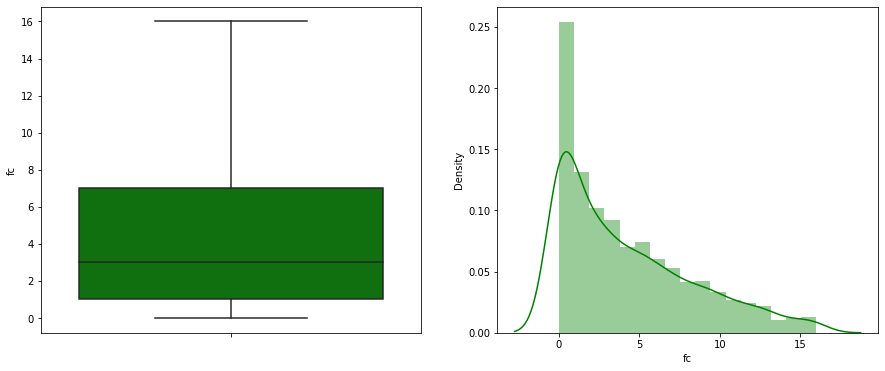

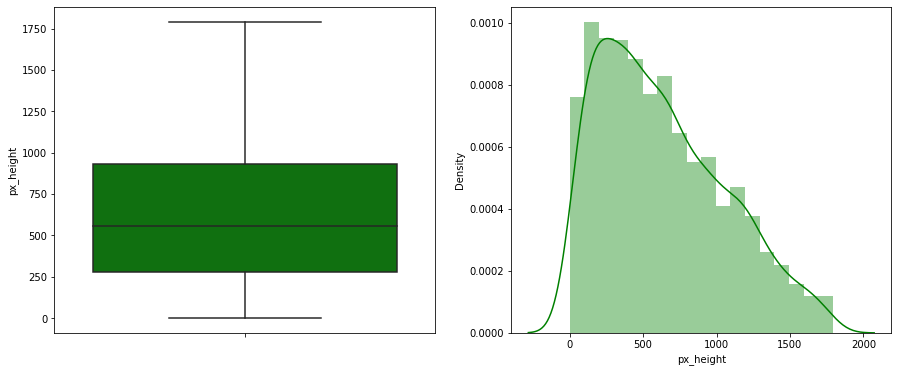

In [ ]:
# Visualising whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var],color='green')
    fig.set_xlabel(var)
    plt.show()

Thus we can see in box plot no oultiers are present.

# **Feature Selection**

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

In [ ]:
# checking newly created column.
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0


<Axes: >

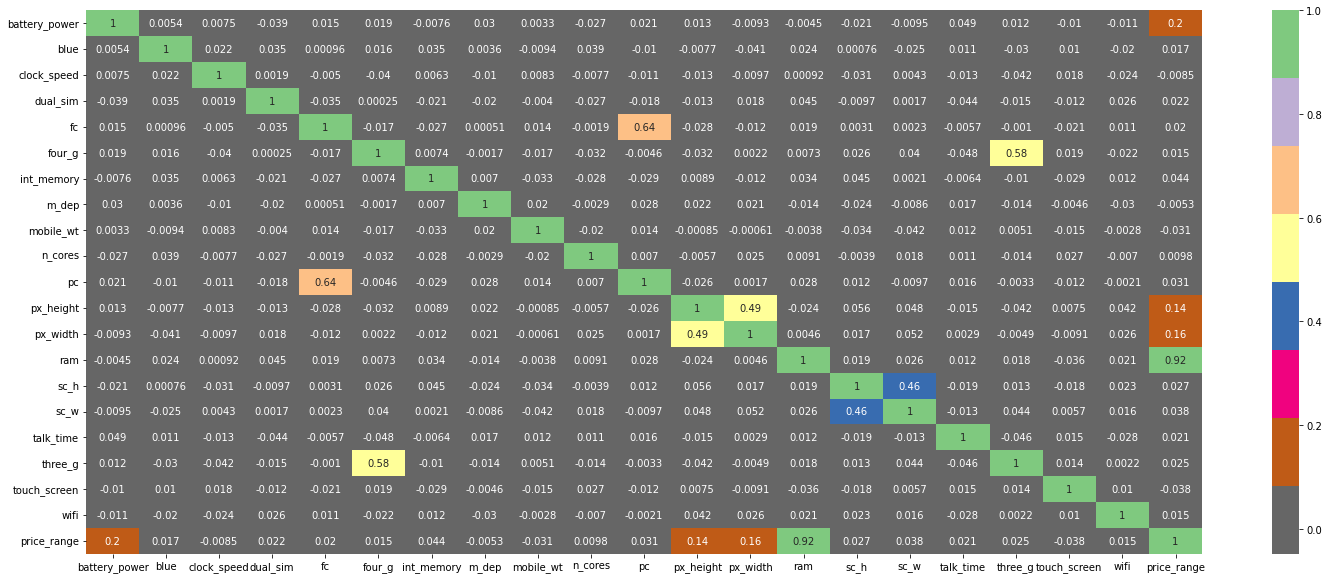

In [ ]:
# Checking the correlation between each variable.
corr= df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

In [ ]:
# Separating X variables(indpendent variables) and Y(dependent variable) variable.
X=df.drop('price_range',axis=1)
y=df["price_range"]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# we Will select the  top 12 important features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)

In [ ]:
# creating score's and coolumn's dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
# concatenating the above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [ ]:
# Check dataframe
featureScores

,Specs,Score
0,battery_power,13399.493422
1,blue,0.574942
2,clock_speed,0.801821
3,dual_sim,0.692208
4,fc,10.807547
5,four_g,1.373364
6,int_memory,79.335880
7,m_dep,0.806024
8,mobile_wt,89.225442
9,n_cores,8.051487


In [ ]:
# 12 features with highest chi squared statistic 
print(featureScores.nlargest(12,'Score'))

            Specs          Score
13            ram  915771.566479
11      px_height   15390.460943
0   battery_power   13399.493422
12       px_width    9299.682574
8       mobile_wt      89.225442
6      int_memory      79.335880
14           sc_h      11.939828
15           sc_w      11.601751
16      talk_time      11.272551
4              fc      10.807547
9         n_cores       8.051487
10             pc       7.681300


In [ ]:
# 12 features with highest chi squared statistic are selected as independent variables.
X=df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_h','talk_time','sc_w','fc','n_cores','pc']]

# dependent varaible
y=df['price_range']


# Predictive Modeling:

Predictive modeling is a commonly used statistical technique to predict future behavior. Predictive modeling solutions are a form of data-mining technology that works by analyzing historical and current data and generating a model to help predict future outcomes.


Algorithms used for predictive modeling:
* 1) Decision Tree
* 2) Random Forest classifier
* 3) Gradient Boosting Classifier
* 4) K-nearest Neighbour classifier
* 5) XG Boost Classifier 
* 6) Support Vector Machine(SVM)


**As Decision tree,random forest and enssembles trees do not require Feature scaling as these are Tree based models. So we will be using X_train and X_test which are not scaled.**

**For K nearest Neighbors and SVM  we will be usingseX_train_scaled and X_test_scaled. That is we we will use Standardised data. i.e. Scaled data.
As these are distance based Algorithms.**

In [ ]:
# importing all essential libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
# splitting the data into Training and tesingt data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1473, 12)
(491, 12)
(1473,)
(491,)


In [ ]:
# Scaling the data.
# creating an object of MinMax Scaler
scaler=StandardScaler()
# fitting the X_train
X_train_scaled=scaler.fit_transform(X_train)   
# transforming X_test
X_test_scaled=scaler.transform(X_test)         

In [ ]:
X_train_scaled

array([[-0.91019637, -1.02077573,  0.98689616, ..., -0.5184728 ,
        -1.13655149,  0.52381817],
       [ 0.04710232, -1.28908581, -1.53141326, ...,  0.45720326,
        -0.6941254 ,  0.35706128],
       [-1.50656139,  0.77106893,  0.46121873, ..., -0.27455378,
        -1.13655149, -0.81023702],
       ...,
       [-0.78561013,  0.71040753,  1.69453887, ..., -1.00631082,
         0.1907268 , -0.97699391],
       [ 0.99890455, -1.35441348,  0.86558599, ...,  1.1889603 ,
         0.63315289,  1.02408887],
       [ 0.17993323, -0.20417986,  0.7307969 , ..., -0.27455378,
         0.63315289, -0.64348012]])

In [ ]:
X_test_scaled

array([[-0.25703468,  0.05946396, -0.24867046, ...,  1.67679832,
         0.1907268 ,  1.35760267],
       [-0.55201093,  2.31793484,  0.4499863 , ..., -1.00631082,
         0.1907268 , -1.14375081],
       [-1.09890789, -1.16309673,  0.81391684, ..., -0.5184728 ,
         1.51800509, -0.81023702],
       ...,
       [-0.24054533,  0.92038932, -1.20118   , ..., -1.00631082,
        -1.13655149, -1.64402151],
       [-0.6830097 , -0.10852148,  1.23850246, ...,  1.67679832,
         0.1907268 ,  0.52381817],
       [ 1.65847877, -0.55881578, -1.58982187, ..., -1.00631082,
         0.1907268 , -1.47726461]])

In [ ]:
# Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  '''It will take y_test and y predicted probabilities
  as input and will plot the roc curve.'''

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
      
  # plotting    
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=300);
  plt.show()

In [ ]:
# creating a class list
Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

# **1) Decision Tree Classifier:**

Classification is a two-step process, learning step and prediction step, in machine learning. In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response for given data.

**Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.**
**So here we will use X_train,X_test,y_test and Y_train which are not scaled.**

***Decision Tree with default hyperparameters:***

In [ ]:
# Creating object of the decision tree
dtc=DecisionTreeClassifier(random_state=0)

In [ ]:
# Fitting/Training the Train set.
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# Predicting y values of train and test data.
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)

In [ ]:
# Checking train set accuracy
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.8126272912423625

In [ ]:
# confusion matrix for test set
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[105,  16,   0,   0],
       [  7,  98,  14,   0],
       [  0,  23,  88,  20],
       [  0,   0,  12, 108]])

In [ ]:
# Printing classification of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       373
         1.0       1.00      1.00      1.00       373
         2.0       1.00      1.00      1.00       360
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



In [ ]:
# printing classification of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90       121
         1.0       0.72      0.82      0.77       119
         2.0       0.77      0.67      0.72       131
         3.0       0.84      0.90      0.87       120

    accuracy                           0.81       491
   macro avg       0.82      0.82      0.81       491
weighted avg       0.82      0.81      0.81       491



* ***Train set accuracy is 100% and test accuracy is 81%.***
* ***Model is overfitted on train set and did not generalised well.***
* ***We will tune hyperparamters to reduce overfitting and try to imporve the model performance.***

### **Let's tune some hypereparameters of Decsion Tree classifier:**

A hyperparameter is a parameter whose value is set before the machine learning process begins. In contrast, the values of other parameters are derived via training. Algorithm hyperparameters affect the speed and quality of the learning process.

In [ ]:
# creating an object of classifier.
dtc_= DecisionTreeClassifier(random_state=0)

In [ ]:
# paramter grid values for hyperparameter tunning.
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

In [ ]:
# applying GridSearchCv and fitting the model with it.
dtc_tune=GridSearchCV(dtc_,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train,y_train)   # model fitting.

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.308 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.298 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.332 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.299 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.313 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.281 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.342 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [ ]:
# getting best parameters for model.
dtc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': None,
 'min_samples_split': 5,
 'splitter': 'random'}

In [ ]:
# getting best estimators
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=5,
                       random_state=0, splitter='random')

In [ ]:
# using best parameters and training the the data.
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)
dtc_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)

In [ ]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.9769178547182621

In [ ]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.8329938900203666

In [ ]:
# getting confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[109,  12,   0,   0],
       [ 14,  94,  11,   0],
       [  0,  17, 101,  13],
       [  0,   0,  15, 105]])

In [ ]:
# printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       373
         1.0       0.97      0.97      0.97       373
         2.0       0.98      0.96      0.97       360
         3.0       0.99      0.98      0.98       367

    accuracy                           0.98      1473
   macro avg       0.98      0.98      0.98      1473
weighted avg       0.98      0.98      0.98      1473



In [ ]:
# printing classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       121
         1.0       0.76      0.79      0.78       119
         2.0       0.80      0.77      0.78       131
         3.0       0.89      0.88      0.88       120

    accuracy                           0.83       491
   macro avg       0.83      0.83      0.83       491
weighted avg       0.83      0.83      0.83       491



In [ ]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and 
  plots the feature importance graph'''
  
  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

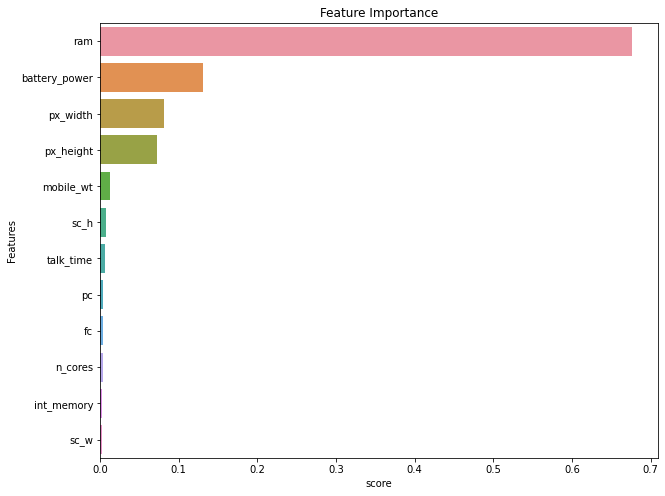

In [ ]:
#plotting feature importances
plot_feature_importance(dtc_optimal)

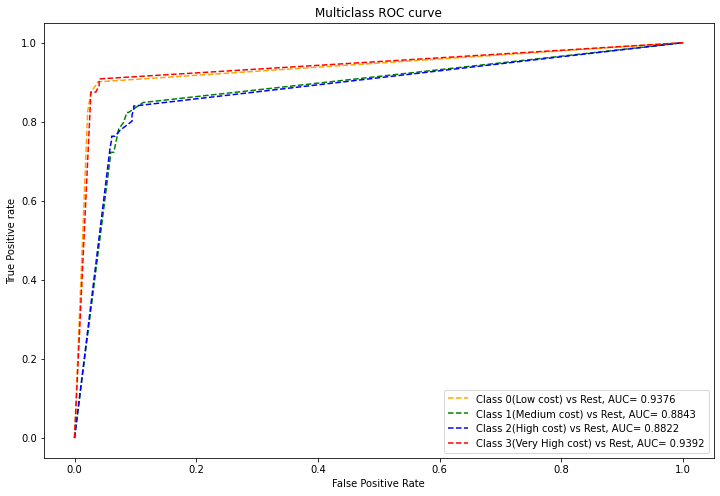

In [ ]:
# Plot AUC ROC curve.
pred_prob = dtc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

### **Decision Tree Classifier-Observations:**
* ***Train accuarcy has been reduced to 97% from 100% and test accuarcy is increased by 2% . Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.***

* ***RAM,battery power,px_height and width came out to be the most important featrures***
* ***This model classified the class 0 and class 3 very nicely as we can see the AUC is almost 0.93 for both classes,whereas for class 1 and class 2 it is 0.88.***

# **2) Random Forest classifier:**

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.


### **With default hyperparamters:**

In [ ]:
# splitting the data into trainset and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# creating an object of the classifier.
rfc=RandomForestClassifier(random_state=0)

In [ ]:
# fitting/training the model.
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# predicting the y values of train set and test set.
y_train_pred=rfc.predict(X_train)
y_pred=rfc.predict(X_test)

In [ ]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.890020366598778

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[111,  10,   0,   0],
       [  7, 101,  11,   0],
       [  0,  15, 110,   6],
       [  0,   0,   5, 115]])

In [ ]:
# printing the classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       373
         1.0       1.00      1.00      1.00       373
         2.0       1.00      1.00      1.00       360
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



In [ ]:
# printing the classification report for train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       121
         1.0       0.80      0.85      0.82       119
         2.0       0.87      0.84      0.86       131
         3.0       0.95      0.96      0.95       120

    accuracy                           0.89       491
   macro avg       0.89      0.89      0.89       491
weighted avg       0.89      0.89      0.89       491



* ***Train accuarcy is 100% and test accuracy is 89%. which is quite good. But model seems to be overfitted and has not generalised the data well. We need to reduce overfitting and improve the model performance.***
* ***we do some hyperparameter tunning to reduce overfitting***

### **Let's do some Hyperparamter Tunning of the Random forest model**

In [ ]:
# para_grid values to pass in gridsearchcv.
grid_values={'n_estimators':[300, 400, 500, 700],
          'max_depth':[None, 10, 20, 40],
          'min_samples_split':[2,6,10],
          'max_leaf_nodes':[None],
          'criterion':['entropy','gini'],
          'max_features':['auto','log2','sqrt']
          
             }

In [ ]:
# creating the instance 
rfc_= RandomForestClassifier(random_state=0)

In [ ]:
# Applying GridSearchCV
rfc_tune=GridSearchCV(rfc_,param_grid=grid_values,cv=3,verbose=3,scoring='accuracy')
rfc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.894 total time=   1.5s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.886 total time=   1.4s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.916 total time=   1.2s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.894 total time=   1.6s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.888 total time=   1.7s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.912 to

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10, 20, 40],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [None],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [300, 400, 500, 700]},
             scoring='accuracy', verbose=3)

In [ ]:
#Getting best paramters for the models
rfc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
# fitting/training the data with best parameters.
rfc_optimal=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=None,max_leaf_nodes=None,min_samples_split=6,n_estimators=700,random_state=0)
rfc_optimal.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       min_samples_split=6, n_estimators=700, random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=rfc_optimal.predict(X_train)
y_pred=rfc_optimal.predict(X_test)

In [ ]:
# checking train accuracy score.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# checking the test accuracy score.
accuracy_score(y_test,y_pred)

0.8839103869653768

In [ ]:
# getting confusion matrix.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[113,   8,   0,   0],
       [  7,  98,  14,   0],
       [  0,  16, 109,   6],
       [  0,   0,   6, 114]])

In [ ]:
# printing the classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       373
         1.0       1.00      1.00      1.00       373
         2.0       1.00      1.00      1.00       360
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



In [ ]:
# printing classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       121
         1.0       0.80      0.82      0.81       119
         2.0       0.84      0.83      0.84       131
         3.0       0.95      0.95      0.95       120

    accuracy                           0.88       491
   macro avg       0.88      0.88      0.88       491
weighted avg       0.88      0.88      0.88       491



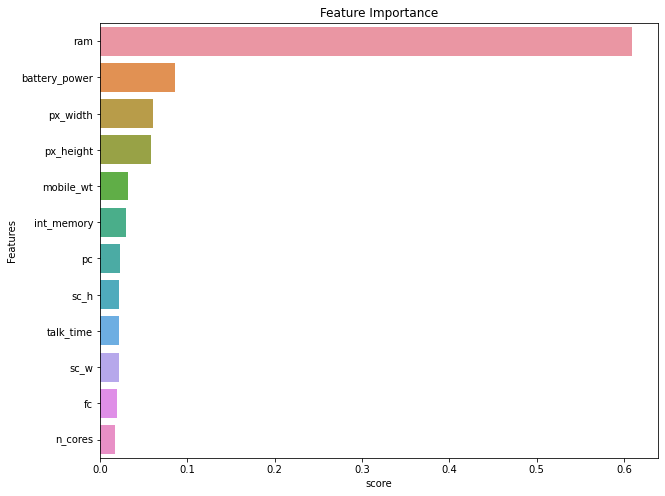

In [ ]:
# plotting feture importance
plot_feature_importance(rfc_optimal)

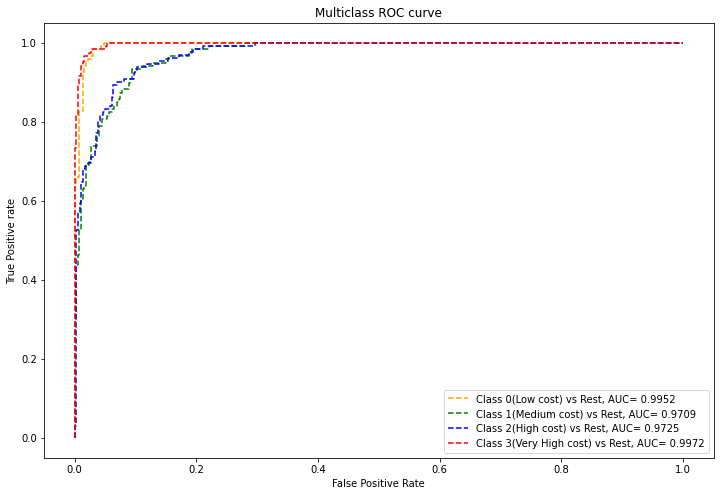

In [ ]:
# Plot AUC ROC curve.
pred_prob = rfc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

###**Observations of Random Forest:**
***Before Tuning***
* ***training accuarcy = 100%***
* ***test accuarcy = 89%***

***Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.***

***After tuning:***
* ***Training accuarcy= 100%***
* ***Test accuarcy = 88%***

***we have not improved the model and Accuracy is decresed slightly.***

***From roc curve its clear that model has poorly performed to classify class 1 and class 2.***

# **3) Gradient Boosting Classifier:**

### **With default hyperparameters:**

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [ ]:
# fittng/training the data.
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=gbc.predict(X_train)
y_pred=gbc.predict(X_test)

In [ ]:
# checking the accuracy score of train data.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.9042769857433809

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[111,  10,   0,   0],
       [  5, 106,   8,   0],
       [  0,  13, 112,   6],
       [  0,   0,   5, 115]])

In [ ]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       373
         1.0       1.00      1.00      1.00       373
         2.0       1.00      1.00      1.00       360
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



In [ ]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       121
         1.0       0.82      0.89      0.85       119
         2.0       0.90      0.85      0.88       131
         3.0       0.95      0.96      0.95       120

    accuracy                           0.90       491
   macro avg       0.91      0.91      0.91       491
weighted avg       0.91      0.90      0.90       491



### **Let's do some hyperparameter tuning.**

In [ ]:
# Creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [ ]:
# para_grid values to pass in gridsearchcv.
grid_values={'learning_rate':[0.005,1,2,3],
             'min_samples_split':range(10,26)
          
             }

In [ ]:
# Applying GridSearchCV
gbc_tune=GridSearchCV(gbc,param_grid=grid_values,cv=3,verbose=1,scoring='accuracy')
gbc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.005, 1, 2, 3],
                         'min_samples_split': range(10, 26)},
             scoring='accuracy', verbose=1)

In [ ]:
# Getting best parameters
gbc_tune.best_params_

{'learning_rate': 1, 'min_samples_split': 24}

In [ ]:
# getting best estimators
gbc_tune.best_estimator_

GradientBoostingClassifier(learning_rate=1, min_samples_split=24,
                           random_state=0)

In [ ]:
# aplying best estimarors
gbc_optimal=GradientBoostingClassifier(learning_rate=1,random_state=0,min_samples_split=25)
gbc_optimal.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, min_samples_split=25,
                           random_state=0)

In [ ]:
# predicting the y values of train and test set.
y_train_pred=gbc_optimal.predict(X_train)  
y_pred=gbc_optimal.predict(X_test)

In [ ]:
# train set accuracy score
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# test set accuracy score
accuracy_score(y_test,y_pred)

0.8981670061099797

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[112,   9,   0,   0],
       [  5, 106,   8,   0],
       [  0,  11, 113,   7],
       [  0,   0,  10, 110]])

In [ ]:
# printing the classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       373
         1.0       1.00      1.00      1.00       373
         2.0       1.00      1.00      1.00       360
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94       121
         1.0       0.84      0.89      0.87       119
         2.0       0.86      0.86      0.86       131
         3.0       0.94      0.92      0.93       120

    accuracy                           0.90       491
   macro avg       0.90      0.90      0.90       491
weighted avg       0.90      0.90      0.90       491



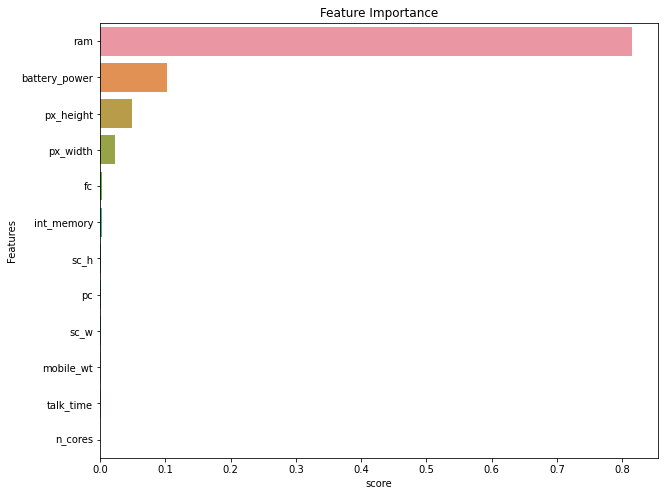

In [ ]:
#plotting feature importances
plot_feature_importance(gbc_optimal)

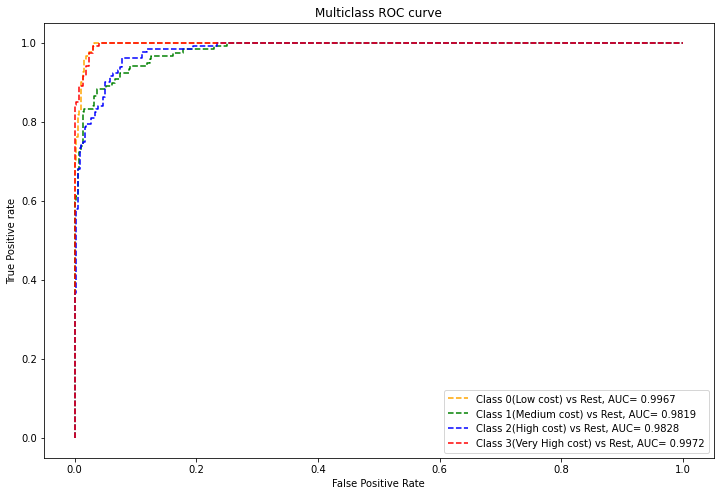

In [ ]:
# Plot AUC ROC curve.
pred_prob = gbc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

### **Observations of Gradient Boost Classifiers:**

***Before tunning:***
* ***Train accuracy score= 100%.***
* ***Test accuracy score= 90%***

***Model did not generalised well and overfitted the training data.*** ***so we tuned hyperparameters of model.***

***After Hyperparameter Tuning***
* ***Train accuracy score= 100%***
* ***Test accuarcy score=89%***

***Thus the model preformance has slightly decresed.However the model is not best.***





***From ROC curve it's clear that model was good to classify the class 0 and class 3.From the classification report its clear that recall for class 0 and class 3 is also good which is 93% and 92% respectively.***


# **4) K Nearest Neighbors**

KNN is one of the simplest forms of machine learning algorithms mostly used for classification. It classifies the data point on how its neighbor is classified. KNN classifies the new data points based on the similarity measure of the earlier stored data points. 

### **With default hyperparametrs:**

In [ ]:
knn=KNeighborsClassifier()     # creating an object of the classifier
knn.fit(X_train_scaled,y_train)   #  fitting the data

KNeighborsClassifier()

In [ ]:
# predicting the y values of train and test set.
y_train_pred=knn.predict(X_train_scaled)
y_pred=knn.predict(X_test_scaled)

In [ ]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

0.7691785471826205

In [ ]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.5987780040733197

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[97, 23,  1,  0],
       [34, 65, 20,  0],
       [ 3, 56, 59, 13],
       [ 0, 10, 37, 73]])

In [ ]:
# printing the classification report of test set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       373
         1.0       0.64      0.71      0.67       373
         2.0       0.71      0.70      0.71       360
         3.0       0.95      0.82      0.88       367

    accuracy                           0.77      1473
   macro avg       0.78      0.77      0.77      1473
weighted avg       0.78      0.77      0.77      1473



In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76       121
         1.0       0.42      0.55      0.48       119
         2.0       0.50      0.45      0.48       131
         3.0       0.85      0.61      0.71       120

    accuracy                           0.60       491
   macro avg       0.62      0.60      0.61       491
weighted avg       0.62      0.60      0.60       491



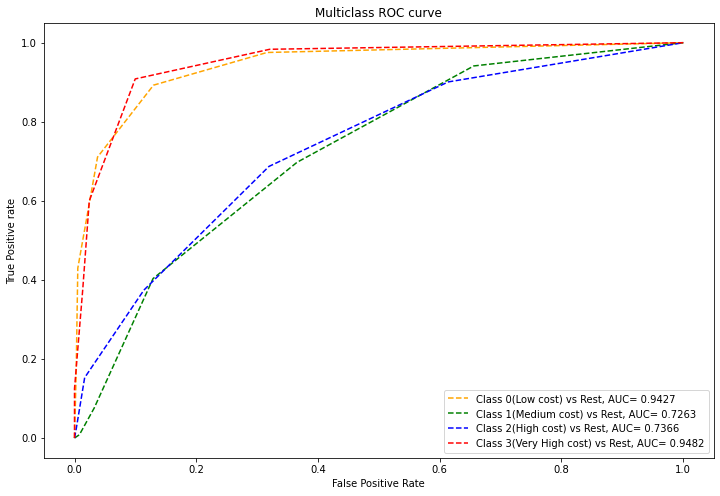

In [ ]:
# Plot AUC ROC curve.
pred_prob = knn.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

### **Let's do some HyperParameter tuning.**

In [ ]:
# creating an object of classifier
knn=KNeighborsClassifier()

In [ ]:
# parameter grid values.
grid_values = {'n_neighbors':list(range(1, 31))}

In [ ]:
# applyong GridSearchCv with above grid values and cv=5
knn_tune=GridSearchCV(knn,cv=5,scoring='accuracy',verbose=3,param_grid=grid_values)
knn_tune.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.566 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.576 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.563 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.582 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.568 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.529 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.498 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.508 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.571 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.520 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.529 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=3)

In [ ]:
# getting thge best parameters
knn_tune.best_params_                     # thus  best n_neighnors came out to be 29

{'n_neighbors': 23}

In [ ]:
# fitting the data with best parameters
knn_optimal=KNeighborsClassifier(n_neighbors=29)
knn_optimal.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=29)

In [ ]:
# predicting y values of train and test set.
y_train_pred=knn_optimal.predict(X_train_scaled)
y_pred=knn_optimal.predict(X_test_scaled)

In [ ]:
#checking the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.7542430414120842

In [ ]:
# checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.639511201629328

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[104,  17,   0,   0],
       [ 29,  70,  20,   0],
       [  1,  48,  65,  17],
       [  0,   1,  44,  75]])

In [ ]:
# printig tye classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       373
         1.0       0.69      0.65      0.67       373
         2.0       0.65      0.70      0.67       360
         3.0       0.89      0.77      0.83       367

    accuracy                           0.75      1473
   macro avg       0.76      0.75      0.75      1473
weighted avg       0.76      0.75      0.75      1473



In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       121
         1.0       0.51      0.59      0.55       119
         2.0       0.50      0.50      0.50       131
         3.0       0.82      0.62      0.71       120

    accuracy                           0.64       491
   macro avg       0.65      0.64      0.64       491
weighted avg       0.65      0.64      0.64       491



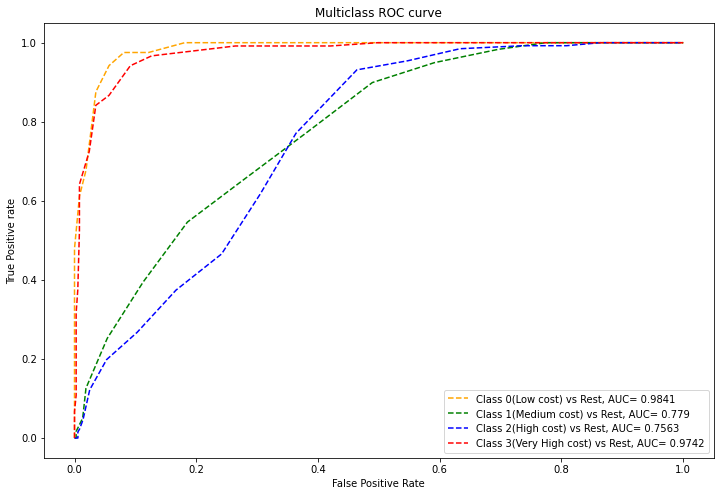

In [ ]:
# Plot AUC ROC curve.
pred_prob = knn_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

### **Observations:**
***Before hyperparameters tuning:***

* ***Train Accuracy:76 %***
* ***Test Accuarcy:59 %***

***Clearly Model has performed very worst. We did hyperparameter tuning***

***After Hyperparameter Tuning:***

* ***Train Accuarcy: 75%***
* ***Test Accuarcy: 63%***

***Surely we improved the model perfromance and reduced overfitting but however this is not  good model for us.***

# **5) XGBoost Classifier:** 

XGBoost classifier is a Machine learning algorithm that is applied for structured and tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. XGBoost is an extreme gradient boost algorithm.

XGBoost has the ability to handle missing data and large datasets efficiently. It also has a number of hyperparameters that can be tuned to improve model performance, including the learning rate, depth of the trees, and regularization parameters.

### **With default hyperparameter**

In [ ]:
# spltting the data into train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
xgb=XGBClassifier()        # creating an object of the classifier
xgb.fit(X_train,y_train)      # fitting the data 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# predicting y values of train and test data.
y_train_pred=xgb.predict(X_train)
y_pred=xgb.predict(X_test)

In [ ]:
# checking the accuracy score of train set 
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.8940936863543788

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[111,  10,   0,   0],
       [  5, 104,  10,   0],
       [  0,  10, 113,   8],
       [  0,   0,   9, 111]])

In [ ]:
# printing the classification report of train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       373
         1.0       1.00      1.00      1.00       373
         2.0       1.00      1.00      1.00       360
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



In [ ]:
# printing the classification report of the test set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       121
         1.0       0.84      0.87      0.86       119
         2.0       0.86      0.86      0.86       131
         3.0       0.93      0.93      0.93       120

    accuracy                           0.89       491
   macro avg       0.90      0.89      0.90       491
weighted avg       0.90      0.89      0.89       491



***Train accuracy = 98%***
***Test Accuarcy= 90 %***

### **Let's Do some Hyperparameter tuning:**

In [ ]:
# parameter grid values for GridSearchCv 
grid_values={
          'learning_rate':[0.6,1],
          'n_estimators':[500,1000],
          'gamma':[0.2],
          'subsample':[0.5,0.6]
          }

In [ ]:
# creating an object of the classifier
xgb = XGBClassifier()

# applying girdsearchcv 
xgb_tune = GridSearchCV(xgb, grid_values, cv=3,verbose=4)
xgb_tune.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.900 total time=   1.7s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.902 total time=   1.7s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.921 total time=   1.7s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.916 total time=   1.9s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.904 total time=   1.9s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.927 total time=   4.7s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.898 total time=   3.2s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.902 total time=   3.2s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2], 'learning_rate': [0.6, 1],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.6]},
             verbose=4)

In [ ]:
xgb_tune.best_params_

{'gamma': 0.2, 'learning_rate': 0.6, 'n_estimators': 500, 'subsample': 0.6}

In [ ]:
xgb_opti=XGBClassifier(learning_rate=.6,gamma=0.2,n_estimators=1000,subsample=0.5)
xgb_opti.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_train_pred=xgb_opti.predict(X_train)
y_pred=xgb_opti.predict(X_test)

In [ ]:
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
accuracy_score(y_test,y_pred)

0.8940936863543788

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[110,  11,   0,   0],
       [  5, 107,   7,   0],
       [  0,  14, 110,   7],
       [  0,   0,   8, 112]])

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       373
         1.0       1.00      1.00      1.00       373
         2.0       1.00      1.00      1.00       360
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



In [ ]:
#printing the classifiaction report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       121
         1.0       0.81      0.90      0.85       119
         2.0       0.88      0.84      0.86       131
         3.0       0.94      0.93      0.94       120

    accuracy                           0.89       491
   macro avg       0.90      0.90      0.90       491
weighted avg       0.90      0.89      0.89       491



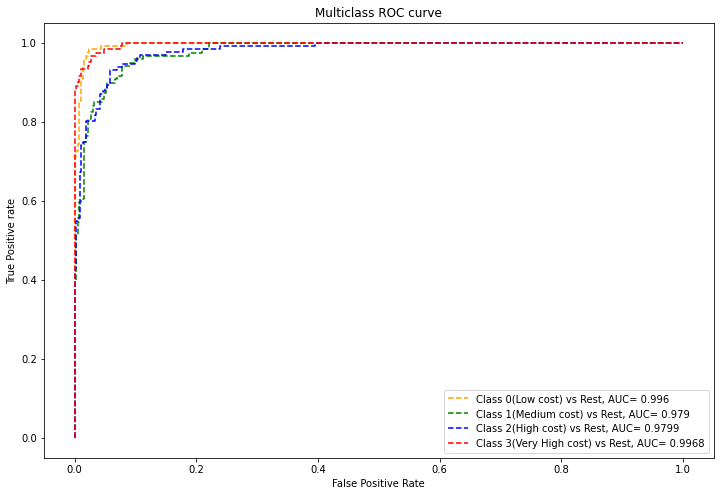

In [ ]:
# Plot AUC ROC curve.
pred_prob = xgb_opti.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

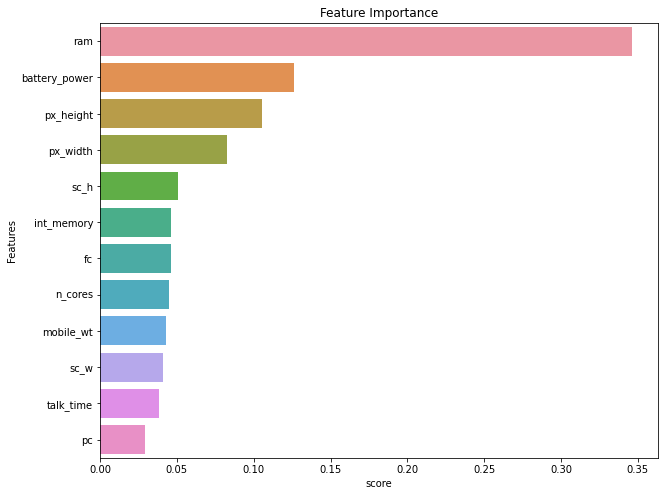

In [ ]:
#plotting feature importances
plot_feature_importance(xgb_opti)

### **Observations**

***Before hyperparameter Tuning***
* ***Train Accuarcy = 98%***
* ***Test Accuarcy = 90%***

***After hyperparameter Tuning***
* ***Train Accuarcy = 100%***
* ***Test Accuarcy = 90%***

***we have improved the model performance by Hyperparamter tuning. Test accuracy is same to 90%.But still the difference of accuracy score between train and test is  more than 2%.We can say model is very slightly overfitted***

***From AUC-ROC curve its clear that model has almost correctly predicted the class 0 and class 3.***

# **6) Support Vector Machine (SVM)**

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

### **With Default Parameters**

In [ ]:
# Importing All Relevant Libraries
from sklearn.svm import SVC

In [ ]:
svc = SVC(random_state=101)      # creating an object of classifier
svc.fit(X_train_scaled,y_train)    # fitting the model/training the model.

SVC(random_state=101)

In [ ]:
# predicting the y value of train set and test set
y_train_pred=svc.predict(X_train_scaled)
y_pred=svc.predict(X_test_scaled)

In [ ]:
# Accuracy score for train set
accuracy_score(y_train,y_train_pred)

0.9809911744738629

In [ ]:
# Accuracy score for test set.
accuracy_score(y_test,y_pred)

0.9042769857433809

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[113,   8,   0,   0],
       [  4, 106,   9,   0],
       [  0,  13, 111,   7],
       [  0,   0,   6, 114]])

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       373
         1.0       0.97      0.98      0.97       373
         2.0       0.96      0.97      0.97       360
         3.0       0.99      0.98      0.99       367

    accuracy                           0.98      1473
   macro avg       0.98      0.98      0.98      1473
weighted avg       0.98      0.98      0.98      1473



In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       121
         1.0       0.83      0.89      0.86       119
         2.0       0.88      0.85      0.86       131
         3.0       0.94      0.95      0.95       120

    accuracy                           0.90       491
   macro avg       0.91      0.91      0.91       491
weighted avg       0.91      0.90      0.90       491



### **Hyperparameter Tuning**

In [ ]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

In [ ]:
# creating an object for classifier
svm  = SVC ()

In [ ]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose=2)
svm_cv.fit(X_train_scaled,y_train)     # fitting the data into the model

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [ ]:
# getting the best parameters
svm_cv.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [ ]:
# getting the best estimators
svm_cv.best_estimator_

SVC(C=10, degree=1, gamma=0.01, kernel='linear')

In [ ]:
# applying best parameters to the SVm model.
svm_optimal=SVC(C=10, degree=1, gamma=0.01, kernel='linear',probability=True)
svm_optimal.fit(X_train_scaled,y_train)   # fitting the data

SVC(C=10, degree=1, gamma=0.01, kernel='linear', probability=True)

In [ ]:
# predicting the y values of train and test set.
y_train_pred=svm_optimal.predict(X_train_scaled)    
y_pred=svm_optimal.predict(X_test_scaled)

In [ ]:
y_train_pred

array([0., 1., 0., ..., 1., 3., 2.])

In [ ]:
y_pred

array([1., 2., 0., 0., 1., 1., 3., 2., 1., 2., 2., 1., 2., 1., 0., 0., 1.,
       2., 0., 1., 2., 1., 1., 2., 1., 0., 0., 0., 0., 1., 1., 3., 3., 2.,
       0., 3., 0., 2., 2., 2., 2., 2., 2., 3., 2., 0., 2., 0., 1., 2., 2.,
       1., 3., 1., 1., 0., 3., 3., 0., 2., 0., 3., 0., 0., 2., 1., 3., 0.,
       0., 2., 0., 3., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2.,
       3., 0., 0., 3., 0., 3., 3., 3., 1., 1., 3., 2., 1., 3., 2., 1., 0.,
       2., 2., 1., 2., 2., 0., 0., 0., 0., 3., 1., 3., 1., 2., 3., 3., 1.,
       2., 3., 0., 3., 1., 2., 2., 1., 1., 1., 1., 1., 0., 2., 2., 2., 0.,
       3., 0., 2., 0., 0., 3., 3., 1., 2., 3., 3., 2., 2., 0., 3., 3., 3.,
       0., 3., 0., 3., 0., 2., 1., 0., 0., 3., 3., 3., 0., 0., 1., 3., 1.,
       2., 2., 1., 1., 2., 2., 3., 1., 1., 3., 3., 0., 2., 2., 2., 1., 1.,
       1., 1., 2., 1., 3., 0., 1., 3., 3., 0., 3., 2., 0., 1., 3., 3., 3.,
       3., 0., 1., 3., 1., 1., 1., 2., 3., 2., 0., 2., 0., 1., 2., 0., 0.,
       2., 2., 0., 2., 1.

In [ ]:
# checkig the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.9823489477257298

In [ ]:
# checking the accuracy of test data
accuracy_score(y_test,y_pred)

0.9775967413441955

In [ ]:
# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[121,   0,   0,   0],
       [  4, 114,   1,   0],
       [  0,   4, 126,   1],
       [  0,   0,   1, 119]])

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       373
         1.0       0.98      0.98      0.98       373
         2.0       0.97      0.97      0.97       360
         3.0       0.98      0.99      0.99       367

    accuracy                           0.98      1473
   macro avg       0.98      0.98      0.98      1473
weighted avg       0.98      0.98      0.98      1473



In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       121
         1.0       0.97      0.96      0.96       119
         2.0       0.98      0.96      0.97       131
         3.0       0.99      0.99      0.99       120

    accuracy                           0.98       491
   macro avg       0.98      0.98      0.98       491
weighted avg       0.98      0.98      0.98       491



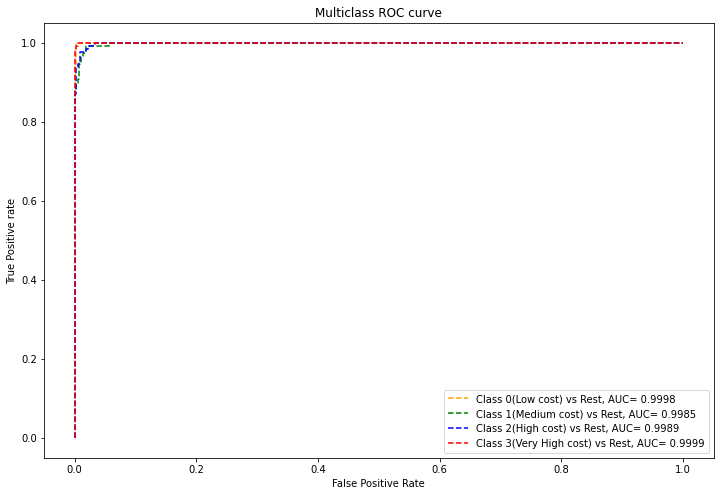

In [ ]:
#  Plot AUC ROC curve.
pred_prob = svm_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

<Axes: >

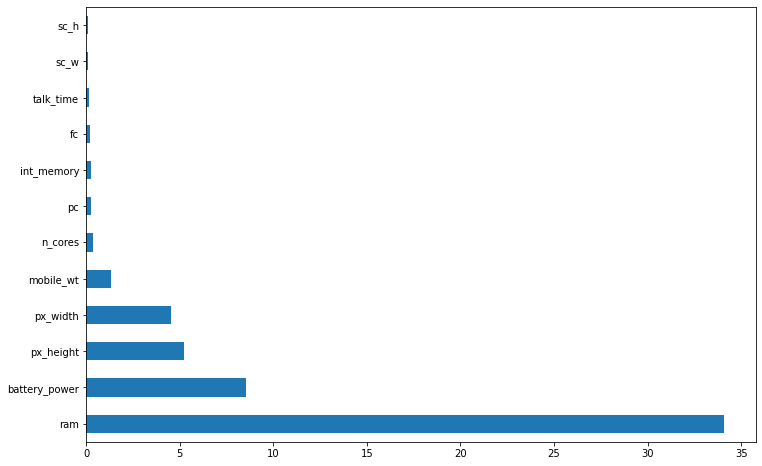

In [ ]:
plt.figure(figsize=(12,8))
pd.Series(abs(svm_optimal.coef_[0])+abs(svm_optimal.coef_[1])+abs(svm_optimal.coef_[2])+abs(svm_optimal.coef_[3]), index=X_train.columns).nlargest(12).plot(kind='barh')

### **Observations**


* ***Accuracy score on train set is 98.5% and Test score is 90%.***
***Model seems to be overfitted as the differance between train and test accuracy score is almot 9%.***
* ***After Hyperparameter tuning train accuracy remained almost same  98.3% and test accuracy score increased to 97%.*** 
*  ***SVM performed very well as compared to other alogorithms.***
* ***In terms of feature importance RAM,Battery power,px_height and px_weight are the imporatant features.***
* ***f1 score for individual classes is also very good. Area under curve for each class prediction is also almost 1.***

#Conclusions:

*  In this project, we worked on a mobile price range prediction problem wherein we had to classify the price range with different classification algorithms to check the performance of the data.
*   The dataset contained about 2000 records, and 21 attributes.
*  This dataset contains no null values,duplicate values and missing values and doing exploratory data analysis (EDA).
*   price_range is our target/dependent variable and there is no imbalance in target variable.
*   Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.
Mobiles having RAM less than 1000 MB falls under low cost category.
* In Decision Tree Classifier the Train accuarcy has been reduced to 97% from 100% and test accuarcy is increased by 2% . Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.
*  In Random Forest and  Gradient Boosting Classifier the Train accuracy is same but the Test accuracy is decreased slightly.
*  In XGBoost classifier the Train accuracy is decreased from 100 to 98 but the Test accuracy remains same, hence this model is slightly overfitted 
* In Support Vector Machine the Train accuracy is same but the Test accuracy is increased from 90 to 97 percent.SVM performed very well as compared to other alogorithms.
* From the above algorithms we can conclude that Support Vector Machine with using hyperparameters we got the best results.






